Basis pursuit
=============

Reimplementation of 
https://github.com/SpM-lab/CS-tools/tree/master/jpsj-review/basis_pursuit

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

In [1]:
import sys
sys.path.append("../src/")

In [8]:
from admmsolver.objectivefunc import LeastSquares, L1Regularizer
from admmsolver.optimizer import SimpleOptimizer
from admmsolver.matrix import identity
from matplotlib import pyplot as plt
import numpy as np

In [6]:
# Dimension of the signal
N = 1000

M = 100
K = 20    
seed = 1234
np.random.seed(seed)
A = np.random.randn(M,N);

#Make answer vector
xanswer = np.zeros(N)
xanswer[:K] = np.random.randn(K)
xanswer = np.random.permutation(xanswer)

y_calc = np.dot(A, xanswer)

In [9]:
lstsq = LeastSquares(1.0, A, y_calc)
l1 = L1Regularizer(1.0, A.shape[1])
equality_conditions = [
      (1, 0, identity(N), identity(N), 1.0, None)
]
opt = SimpleOptimizer([lstsq, l1], equality_conditions)

In [10]:
niter = 100
opt.solve(niter)

/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


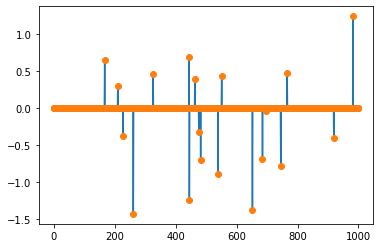

In [16]:
plt.plot(opt.x[0], label="x")
plt.plot(xanswer, label="answer", ls="", marker="o")